In [66]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import statsmodels.tsa.api as smt
rcParams['figure.figsize'] = 10, 6
import warnings
warnings.filterwarnings('ignore')


!pip install pmdarima --quiet
import pmdarima as pm

### Data Containing Linkedin Post Impression of 90Days

In [67]:
rawData=pd.read_csv("linkeding-data.csv")

In [68]:
rawData.head(15
            )

,Date,Impressions,Unnamed: 2
0,8/5/2023,16,NaN
1,8/6/2023,2,NaN
2,8/7/2023,2,NaN
3,8/8/2023,2,NaN
4,8/9/2023,2,NaN
5,8/10/2023,1,NaN
6,8/11/2023,0,NaN
7,8/12/2023,0,NaN
8,8/13/2023,0,NaN
9,8/14/2023,2,NaN


In [69]:
rawData.columns

Index(['Date', 'Impressions', 'Unnamed: 2'], dtype='object')

In [70]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         90 non-null     object 
 1   Impressions  90 non-null     int64  
 2   Unnamed: 2   0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ KB


In [71]:
rawData.drop(labels="Unnamed: 2",axis=1,inplace=True)

In [72]:
rawData


,Date,Impressions
0,8/5/2023,16
1,8/6/2023,2
2,8/7/2023,2
3,8/8/2023,2
4,8/9/2023,2
...,...,...
85,10/29/2023,5945
86,10/30/2023,9361
87,10/31/2023,7948
88,11/1/2023,7260


In [73]:
rawData['Date']=pd.to_datetime(rawData["Date"],infer_datetime_format=True)

In [74]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         90 non-null     datetime64[ns]
 1   Impressions  90 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [75]:
rawData.describe()

,Impressions
count,90.000000
mean,3370.411111
std,3306.303846
min,0.000000
25%,963.000000
50%,2610.500000
75%,4488.000000
max,16552.000000


In [76]:
indexedRawData=rawData.set_index("Date")

In [77]:
indexedRawData

,Impressions
Date,
2023-08-05,16
2023-08-06,2
2023-08-07,2
2023-08-08,2
2023-08-09,2
...,...
2023-10-29,5945
2023-10-30,9361
2023-10-31,7948


In [78]:
indexedRawData.describe()

,Impressions
count,90.000000
mean,3370.411111
std,3306.303846
min,0.000000
25%,963.000000
50%,2610.500000
75%,4488.000000
max,16552.000000


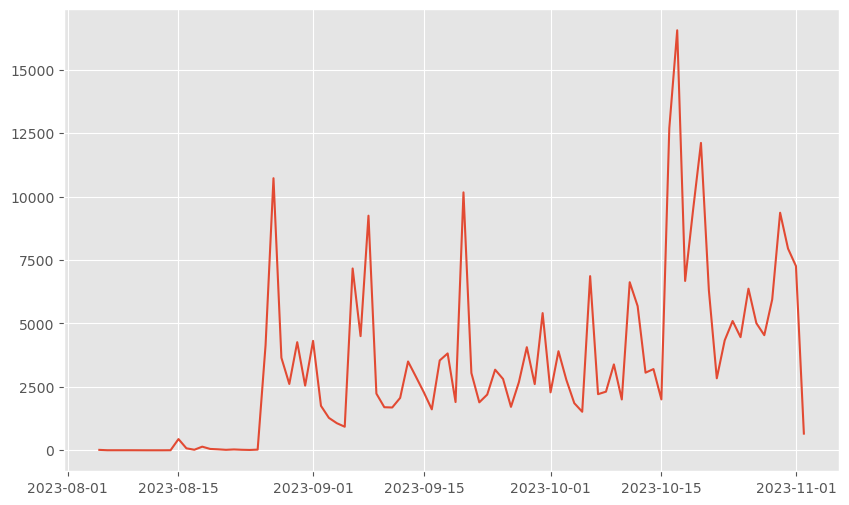

In [79]:
plt.plot(indexedRawData)

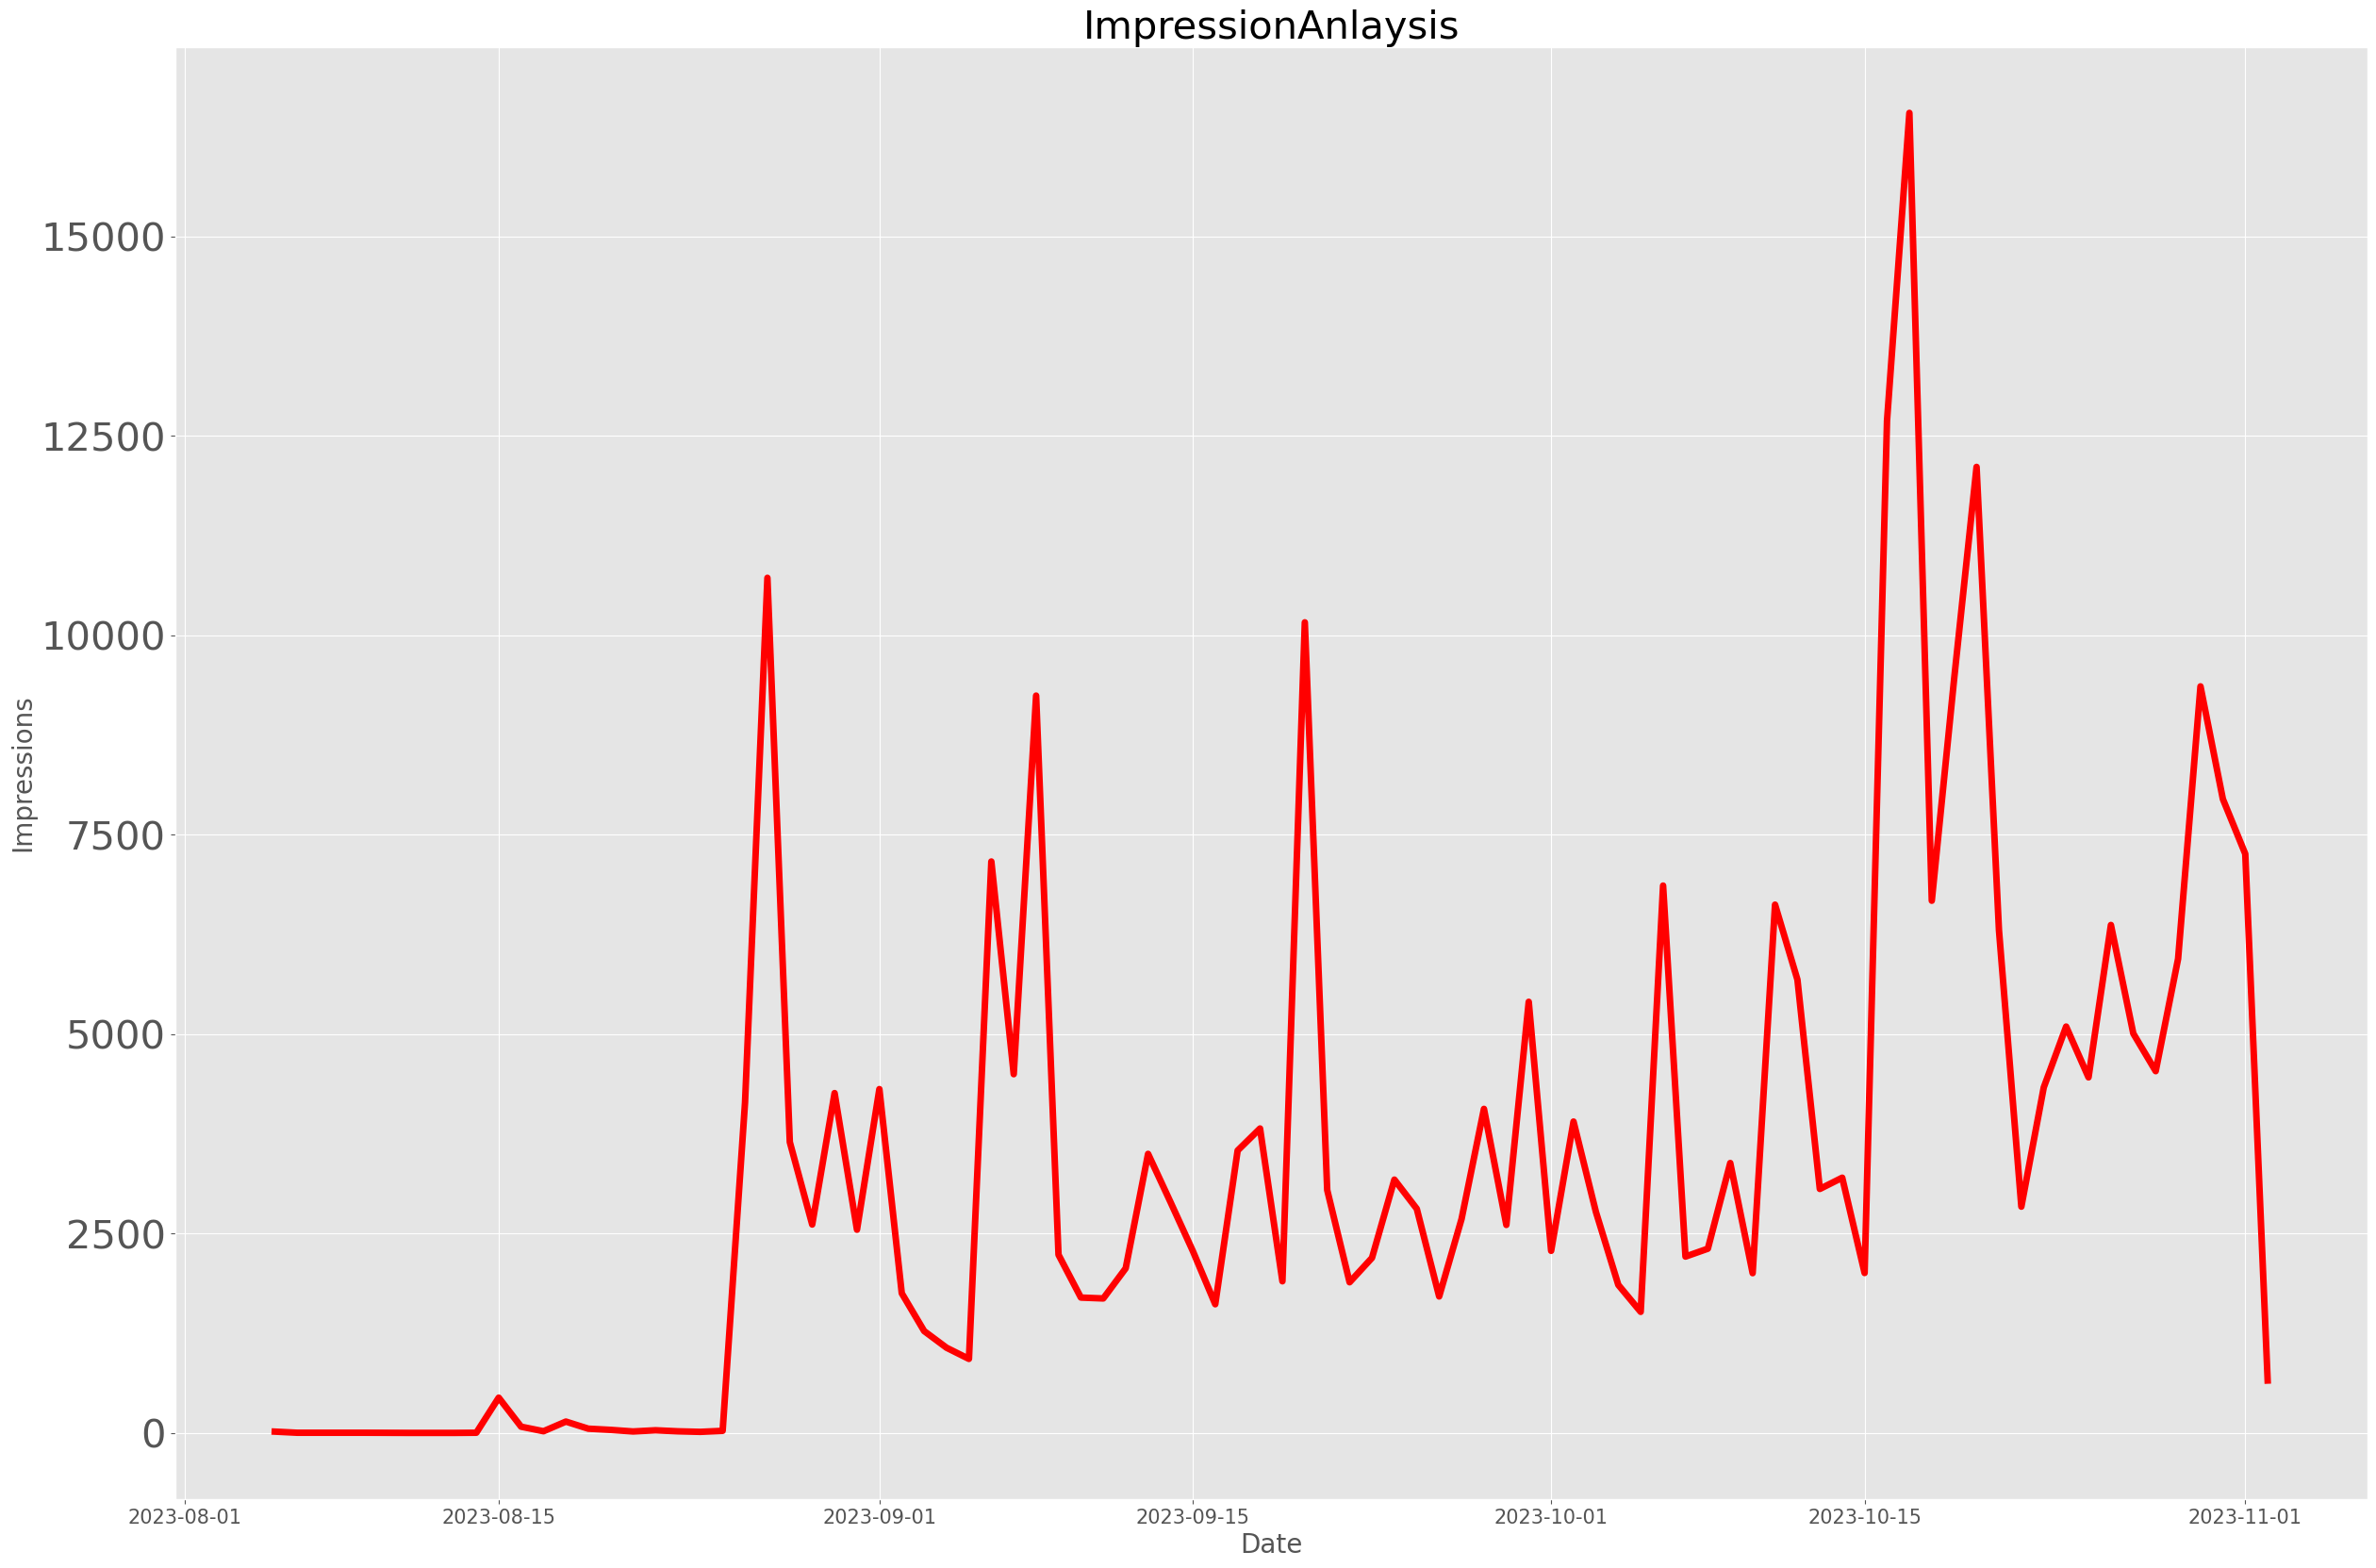

In [80]:
plt.style.use('ggplot')
plt.figure(figsize=(30,20))
plt.grid(True)
plt.xlabel('Date',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=30)
plt.ylabel('Impressions',fontsize=20)
plt.plot(indexedRawData['Impressions'],linewidth = 5,color="red")
plt.title('ImpressionAnlaysis',fontsize=30)
plt.show()

(array([19.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  1.,  3.,  2.,  2.,  1.,  3.,  1.,  4.,  1.,  0.,  1.,
         3.,  1.,  3.,  0.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
         1.,  1.,  1.,  1.,  2.,  2.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,
         0.,  2.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

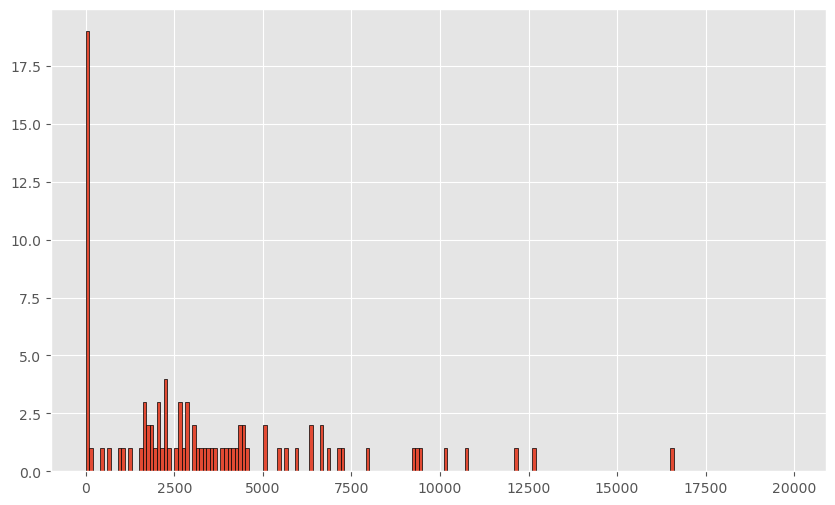

In [81]:
plt.hist(indexedRawData['Impressions'],bins=range(0,20000,100),edgecolor='black')

<AxesSubplot:xlabel='Impressions', ylabel='Density'>

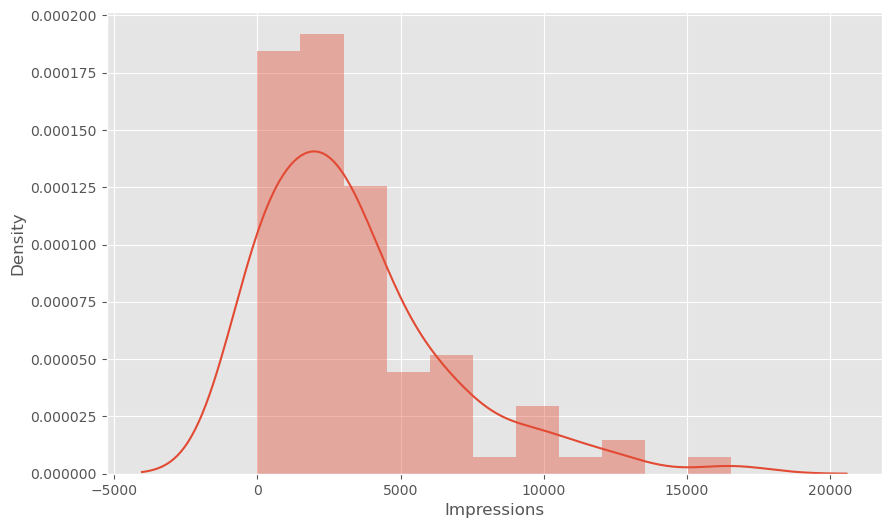

In [82]:
import seaborn as sns
sns.distplot(indexedRawData.Impressions)

In [83]:
rolmean=indexedRawData.Impressions.rolling(30).mean()
rolstd=indexedRawData.Impressions.rolling(30).std()

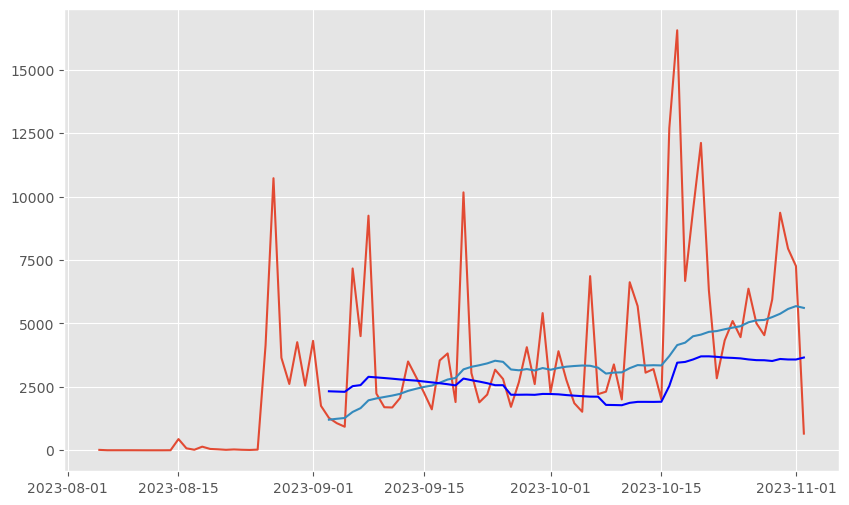

In [84]:
plt.plot(indexedRawData.Impressions)
plt.plot(rolmean)
plt.plot(rolstd,color='blue')

In [85]:
adft =adfuller(indexedRawData.Impressions)
adft

(-4.969696665863619,
 2.547090241934571e-05,
 0,
 89,
 {'1%': -3.506057133647011,
  '5%': -2.8946066061911946,
  '10%': -2.5844100201994697},
 1447.2150710908513)

In [86]:
def TestStationary(timeSeries,rollingPeriod):
    rolMean=timeSeries.rolling(rollingPeriod).mean()
    rolstd=timeSeries.rolling(rollingPeriod).std()
    plt.plot(timeSeries['Impressions'],color='blue')
    plt.plot(rolMean,color='black')
    plt.plot(rolstd,color='red')
    adft=adfuller(timeSeries)
    
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

Test Statistics                -4.969697
p-value                         0.000025
No. of lags used                0.000000
Number of observations used    89.000000
critical value (1%)            -3.506057
critical value (5%)            -2.894607
critical value (10%)           -2.584410
dtype: float64


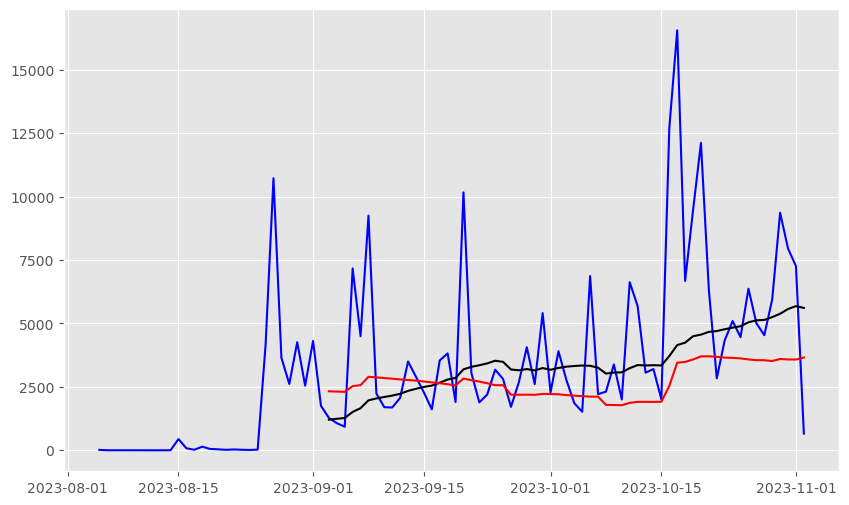

In [87]:
TestStationary(indexedRawData,30)

In [109]:
traindf=indexedRawData[:-20]
testdf=indexedRawData[-20:]

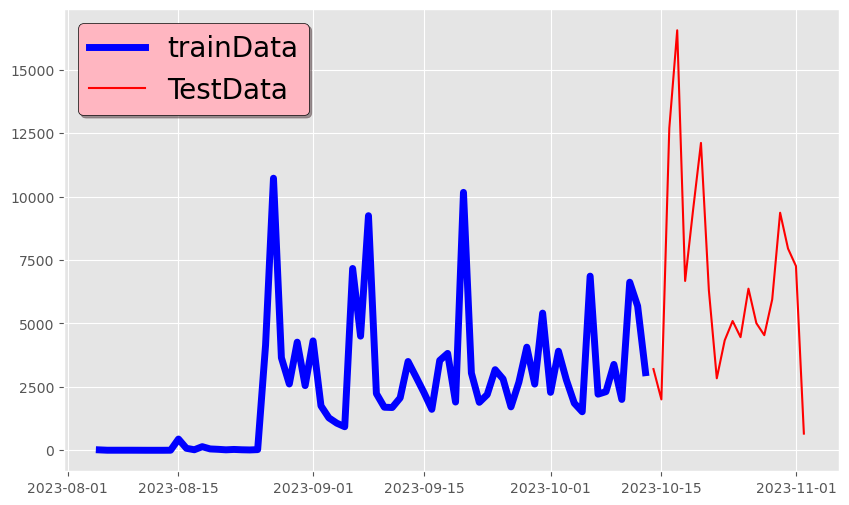

In [117]:
plt.plot(traindf,color='blue',label='trainData',linewidth=5)
plt.plot(testdf,color='red',label='TestData')
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor = 'k')
plt.show()

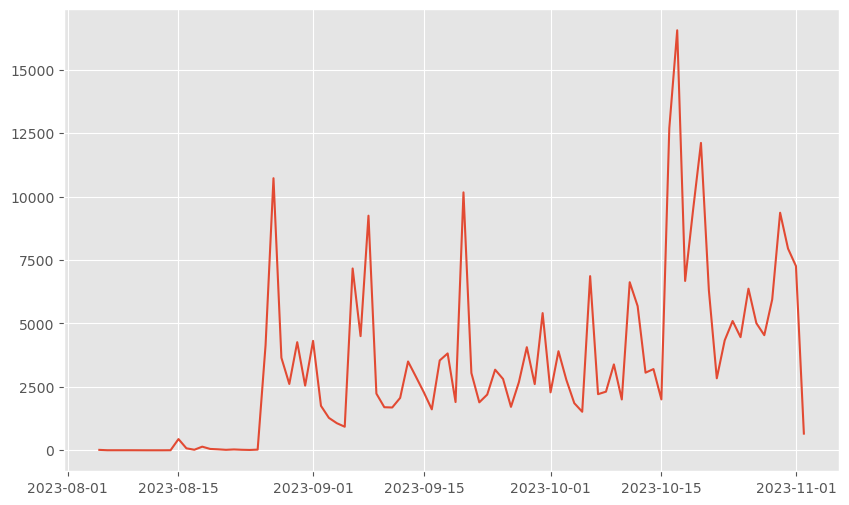

In [88]:
plt.plot(indexedRawData)

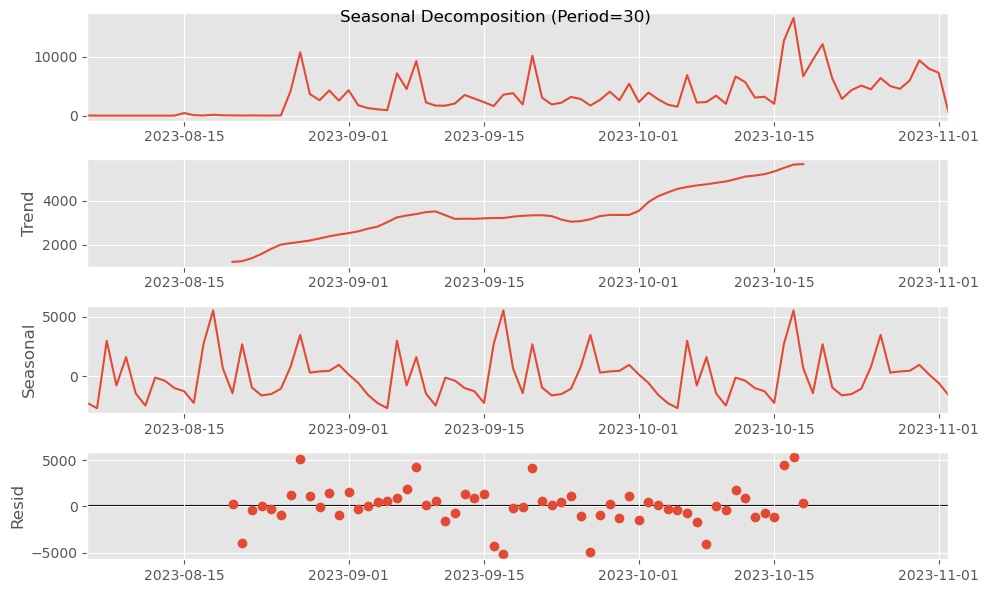

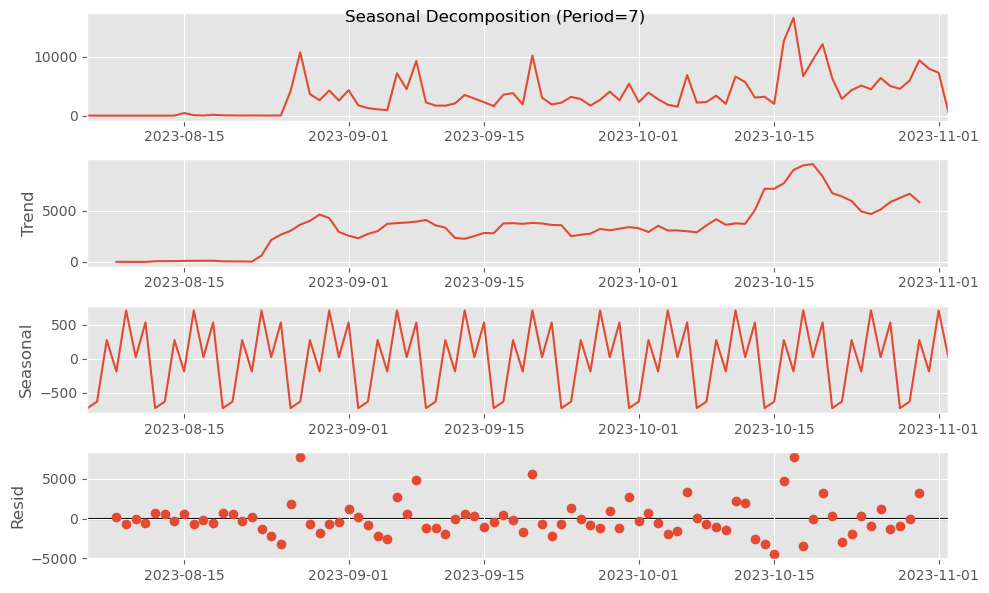

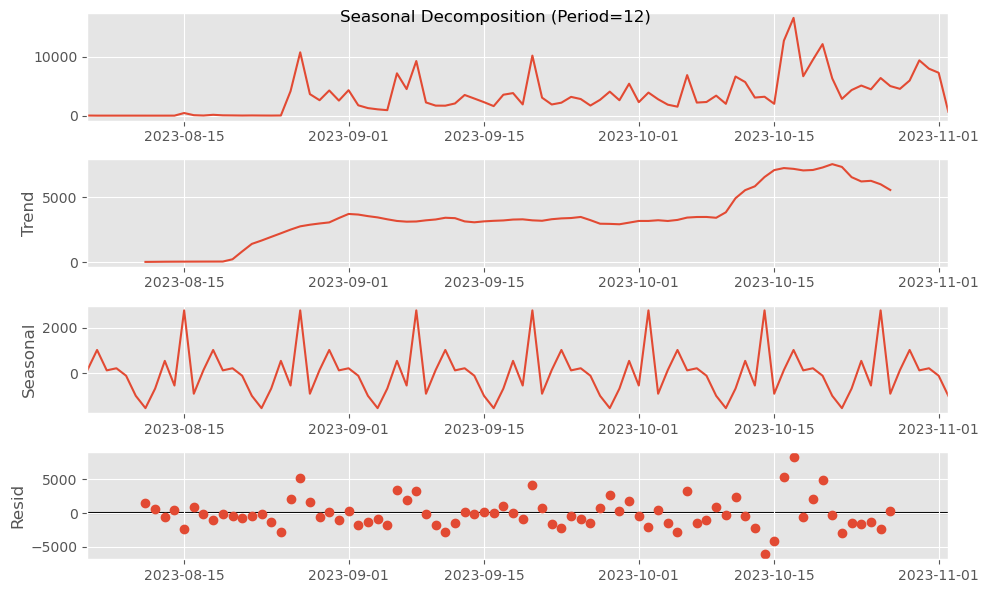

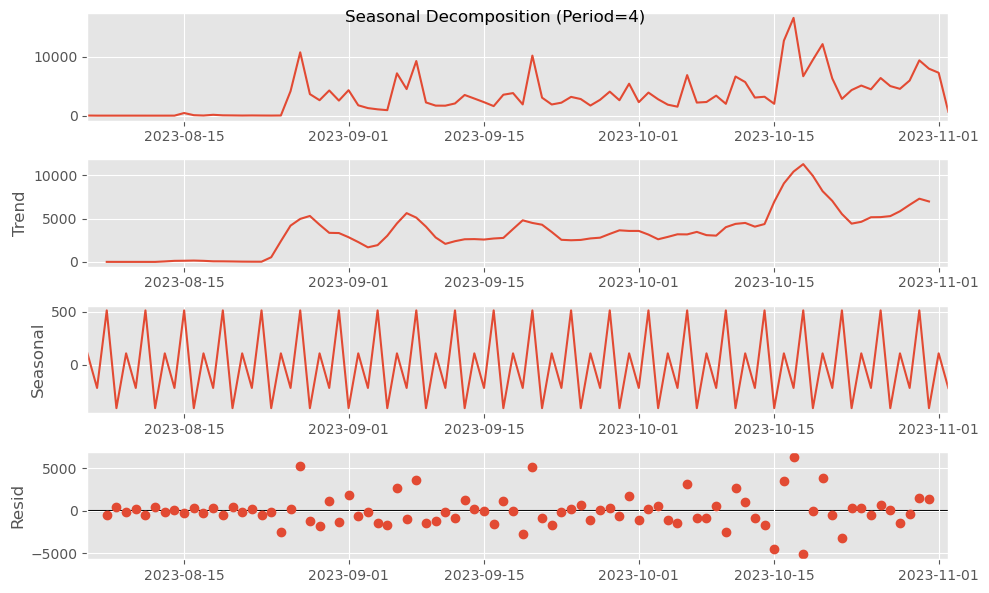

In [89]:
seasonalPeroiod=[30,7,12,4]
for periods in seasonalPeroiod:
    result=seasonal_decompose(indexedRawData,period=periods).plot()
    plt.suptitle(f"Seasonal Decomposition (Period={periods})")
    plt.show()

In [90]:
decomposed =seasonal_decompose(indexedRawData,period=7,model='additive')
originalVsDecomposedSeries=pd.concat([decomposed.observed,decomposed.trend,decomposed.seasonal,decomposed.resid],axis=1)
originalVsDecomposedSeries.columns = ['Actual','Trend','Seasonal','Residual Or Unexplained']

In [91]:
originalVsDecomposedSeries.head(20)
originalVsDecomposedSeries.reset_index(inplace=True)
originalVsDecomposedSeries.columns

Index(['Date', 'Actual', 'Trend', 'Seasonal', 'Residual Or Unexplained'], dtype='object')

In [92]:

originalVsDecomposedSeries['Rank']=originalVsDecomposedSeries['Date'].rank()

In [93]:
originalVsDecomposedSeries

,Date,Actual,Trend,Seasonal,Residual Or Unexplained,Rank
0,2023-08-05,16.0,NaN,-722.117347,NaN,1.0
1,2023-08-06,2.0,NaN,-626.438776,NaN,2.0
2,2023-08-07,2.0,NaN,273.085034,NaN,3.0
3,2023-08-08,2.0,3.571429,-185.795918,184.224490,4.0
4,2023-08-09,2.0,1.285714,707.727891,-707.013605,5.0
...,...,...,...,...,...,...
85,2023-10-29,5945.0,6632.428571,-626.438776,-60.989796,86.0
86,2023-10-30,9361.0,5816.428571,273.085034,3271.486395,87.0
87,2023-10-31,7948.0,NaN,-185.795918,NaN,88.0
88,2023-11-01,7260.0,NaN,707.727891,NaN,89.0


In [94]:
dataForModel=originalVsDecomposedSeries.dropna()
x=dataForModel.loc[:,['Rank']]
y=dataForModel.loc[:,['Trend']]

import statsmodels.api as sm
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()

In [95]:
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Trend   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     161.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           4.70e-21
Time:                        19:03:10   Log-Likelihood:                -722.66
No. Observations:                  84   AIC:                             1449.
Df Residuals:                      82   BIC:                             1454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -55.8868    309.562     -0.181      0.8

In [96]:
originalVsDecomposedSeries['predictedTrend']=originalVsDecomposedSeries['Rank'] * 76.2336 - 55.8868

In [97]:
originalVsDecomposedSeries.head(20)

,Date,Actual,Trend,Seasonal,Residual Or Unexplained,Rank,predictedTrend
0,2023-08-05,16.0,NaN,-722.117347,NaN,1.0,20.3468
1,2023-08-06,2.0,NaN,-626.438776,NaN,2.0,96.5804
2,2023-08-07,2.0,NaN,273.085034,NaN,3.0,172.8140
3,2023-08-08,2.0,3.571429,-185.795918,184.224490,4.0,249.0476
4,2023-08-09,2.0,1.285714,707.727891,-707.013605,5.0,325.2812
5,2023-08-10,1.0,1.000000,22.894558,-22.894558,6.0,401.5148
6,2023-08-11,0.0,1.000000,530.644558,-531.644558,7.0,477.7484
7,2023-08-12,0.0,63.857143,-722.117347,658.260204,8.0,553.9820
8,2023-08-13,0.0,74.714286,-626.438776,551.724490,9.0,630.2156
9,2023-08-14,2.0,77.571429,273.085034,-348.656463,10.0,706.4492


In [98]:
originalVsDecomposedSeries["PredictedTimeSeries"]=originalVsDecomposedSeries["predictedTrend"] + originalVsDecomposedSeries["Seasonal"]

In [99]:
originalVsDecomposedSeries.head(20)

,Date,Actual,Trend,Seasonal,Residual Or Unexplained,Rank,predictedTrend,PredictedTimeSeries
0,2023-08-05,16.0,NaN,-722.117347,NaN,1.0,20.3468,-701.770547
1,2023-08-06,2.0,NaN,-626.438776,NaN,2.0,96.5804,-529.858376
2,2023-08-07,2.0,NaN,273.085034,NaN,3.0,172.8140,445.899034
3,2023-08-08,2.0,3.571429,-185.795918,184.224490,4.0,249.0476,63.251682
4,2023-08-09,2.0,1.285714,707.727891,-707.013605,5.0,325.2812,1033.009091
5,2023-08-10,1.0,1.000000,22.894558,-22.894558,6.0,401.5148,424.409358
6,2023-08-11,0.0,1.000000,530.644558,-531.644558,7.0,477.7484,1008.392958
7,2023-08-12,0.0,63.857143,-722.117347,658.260204,8.0,553.9820,-168.135347
8,2023-08-13,0.0,74.714286,-626.438776,551.724490,9.0,630.2156,3.776824
9,2023-08-14,2.0,77.571429,273.085034,-348.656463,10.0,706.4492,979.534234


In [100]:
!pip install prophet

In [101]:
import prophet
from prophet import Prophet

In [102]:
dataset_fb = rawData
dataset_fb.columns = ['ds','y']
model = Prophet(seasonality_mode='multiplicative')
model.fit(dataset_fb)

19:03:16 - cmdstanpy - INFO - Chain [1] start processing
19:03:16 - cmdstanpy - INFO - Chain [1] done processing


In [103]:
future = model.make_future_dataframe(periods=10,freq='D')

In [104]:
pred=model.predict(future)
pred[["ds","yhat"]].head()

,ds,yhat
0,2023-08-05,-22.386843
1,2023-08-06,34.545800
2,2023-08-07,144.456984
3,2023-08-08,222.003724
4,2023-08-09,314.180303


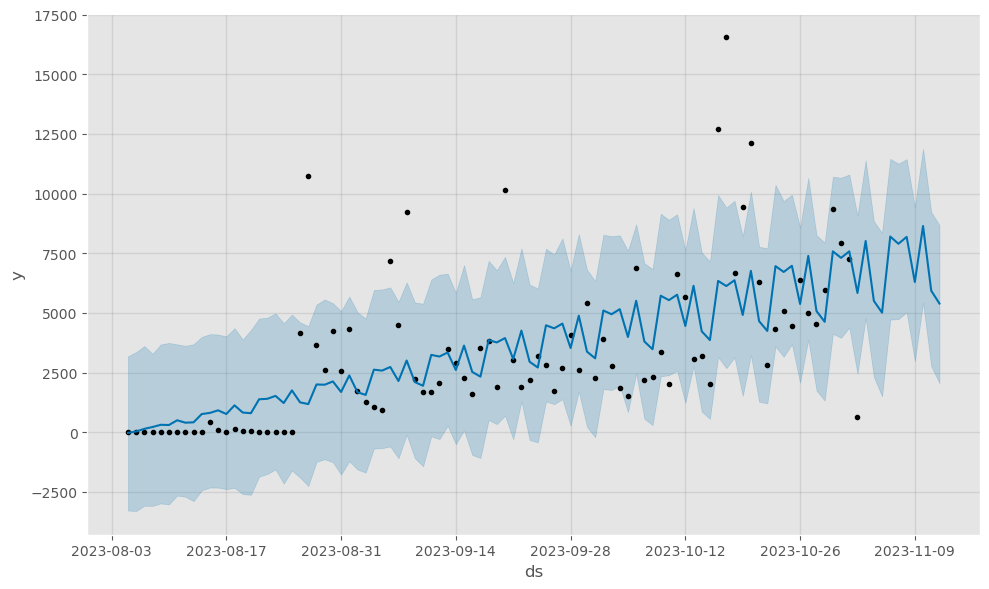

In [105]:
#Multiplicative
plot_model = model.plot(pred)

In [106]:
error = np.sqrt(mean_squared_error(dataset_fb['y'],pred.loc[0:89, 'yhat']))
print('Total RMSE: %.4f' % error)

#Error rate using fbprophet is 10 while using our own technique was 17

Total RMSE: 2576.5371


In [107]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2023-08-05,-27.903527,-3278.706414,3184.376881,-27.903527,-27.903527,-0.197706,-0.197706,-0.197706,-0.197706,-0.197706,-0.197706,0.0,0.0,0.0,-22.386843
1,2023-08-06,47.833403,-3299.141566,3361.559748,47.833403,47.833403,-0.277789,-0.277789,-0.277789,-0.277789,-0.277789,-0.277789,0.0,0.0,0.0,34.545800
2,2023-08-07,123.570334,-3076.818851,3610.696791,123.570334,123.570334,0.169026,0.169026,0.169026,0.169026,0.169026,0.169026,0.0,0.0,0.0,144.456984
3,2023-08-08,199.307265,-3081.677455,3287.335689,199.307265,199.307265,0.113877,0.113877,0.113877,0.113877,0.113877,0.113877,0.0,0.0,0.0,222.003724
4,2023-08-09,275.044195,-2979.342740,3682.703525,275.044195,275.044195,0.142290,0.142290,0.142290,0.142290,0.142290,0.142290,0.0,0.0,0.0,314.180303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-11-08,7167.104846,5027.772200,11442.788102,7167.104834,7167.104859,0.142290,0.142290,0.142290,0.142290,0.142290,0.142290,0.0,0.0,0.0,8186.914001
96,2023-11-09,7242.841776,2978.045100,9439.714415,7242.841760,7242.841792,-0.130514,-0.130514,-0.130514,-0.130514,-0.130514,-0.130514,0.0,0.0,0.0,6297.548076
97,2023-11-10,7318.578706,5425.902764,11879.914535,7318.578685,7318.578726,0.180816,0.180816,0.180816,0.180816,0.180816,0.180816,0.0,0.0,0.0,8641.892142
98,2023-11-11,7394.315636,2772.068269,9221.960145,7394.315610,7394.315660,-0.197706,-0.197706,-0.197706,-0.197706,-0.197706,-0.197706,0.0,0.0,0.0,5932.417916


In [108]:
dataset_fb

,ds,y
0,2023-08-05,16
1,2023-08-06,2
2,2023-08-07,2
3,2023-08-08,2
4,2023-08-09,2
...,...,...
85,2023-10-29,5945
86,2023-10-30,9361
87,2023-10-31,7948
88,2023-11-01,7260
